In [62]:
!git pull
!git add COVID_dataset.ipynb
!git commit -m "updates"
!git push origin main

Already up to date.


The file will have its original line endings in your working directory


[main 761d7be] updates
 1 file changed, 37 insertions(+), 35 deletions(-)


To https://github.com/ahwali/gradproject.git
   bd0a64d..761d7be  main -> main


Merge made by the 'ort' strategy.
 graduate project/anxietynotebook.ipynb | 1 +
 graduate project/model.ipynb           | 1 +
 2 files changed, 2 insertions(+)
 create mode 100644 graduate project/anxietynotebook.ipynb
 create mode 100644 graduate project/model.ipynb


From https://github.com/ahwali/gradproject
   eb56b79..5cf45ca  main       -> origin/main


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ins = pd.read_csv('./dataset/nchs_covid_health_insurance_coverage.csv')
df_access = pd.read_csv('./dataset/nchs_covid_reduced_access_to_health_care.csv')

In [3]:
df_access.columns.values

array(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date',
       'Time Period End Date', 'Value', 'Low CI', 'High CI',
       'Confidence Interval', 'Quartile Range'], dtype=object)

In [4]:
df_access['Indicator'].unique()

array(['Delayed Medical Care, Last 4 Weeks',
       'Did Not Get Needed Care, Last 4 Weeks',
       'Delayed or Did Not Get Care, Last 4 Weeks'], dtype=object)

In [5]:
df_access = df_access.dropna(subset=['Value'])
df_access['Value'].isna().any()

False

In [6]:
df_access['Phase'].unique()

array(['1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1'],
      dtype=object)

In [7]:
df_access['Subgroup'].unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [8]:
df_access_Delayed = df_access[df_access['Indicator']=='Delayed Medical Care, Last 4 Weeks']
df_access_Didnot = df_access[df_access['Indicator']=='Did Not Get Needed Care, Last 4 Weeks']
df_access_Delayed_Didnot = df_access[df_access['Indicator']=='Delayed or Did Not Get Care, Last 4 Weeks']

In [9]:
df_access_Delayed['Phase_adj'] = df_access_Delayed['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)
df_access_Didnot['Phase_adj'] = df_access_Didnot['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)
df_access_Delayed_Didnot['Phase_adj'] = df_access_Delayed_Didnot['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)

C:\Users\ahwal\AppData\Local\Temp/ipykernel_20360/5513587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access_Delayed['Phase_adj'] = df_access_Delayed['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)
C:\Users\ahwal\AppData\Local\Temp/ipykernel_20360/5513587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access_Didnot['Phase_adj'] = df_access_Didnot['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", 

In [10]:
pivot_Delayed = pd.pivot_table(df_access_Delayed, values='Value', index=['Indicator', 'Group', 'State', 'Subgroup'], columns=['Time Period'])

In [11]:
Time_period_dict = {}
for i in df_access_Delayed[df_access_Delayed.State=='California']['Time Period'].values:
    Time_period_dict[i] = f"{df_access_Delayed[df_access_Delayed.State=='California']['Time Period Start Date'].values[i-1]}-{df_access_Delayed[df_access_Delayed.State=='California']['Time Period End Date'].values[i-1]}"

In [12]:
States = df_access_Delayed.State.unique()
States

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
Groups = df_access_Delayed.Group.unique()
Groups

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status'], dtype=object)

In [14]:
Subgroups_ethnicity = df_access_Delayed[df_access_Delayed.Group=='By Race/Hispanic ethnicity'].Subgroup.unique()
Subgroups_ethnicity

array(['Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races'], dtype=object)

In [29]:
phase_dict = {}
j = 0
for i in [1,2,3.02,3.05,3.1]:
    phase_dict[i] = f"{df_access_Didnot[df_access_Didnot.Subgroup == 'Female'].groupby('Phase_adj')['Time Period Start Date'].min()[j]}-{df_access_Didnot[df_access_Didnot.Subgroup == 'Female'].groupby('Phase_adj')['Time Period End Date'].max()[j]}"
    j+=1
Phase_df = pd.DataFrame.from_dict(phase_dict, orient= 'index').reset_index().rename(columns={0: 'Period', 'index':'Phase'})
Phase_df


,Phase,Period
0,1.00,04/23/2020-07/21/2020
1,2.00,08/19/2020-10/26/2020
2,3.02,10/28/2020-12/21/2020
3,3.05,01/06/2021-03/29/2021
4,3.10,04/14/2021-07/05/2021


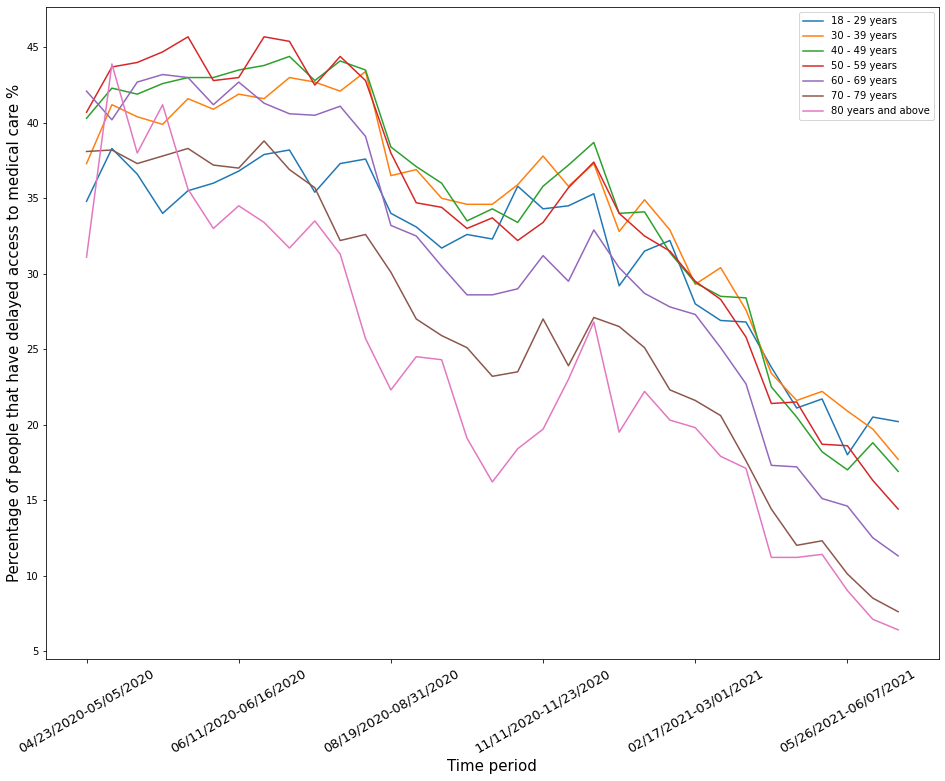

In [57]:
plt.figure(figsize=(16,12))
x_ticks = range(0,len(Time_period_dict))
L_time = list(Time_period_dict.values())
for i in range(0,7):
    sns.lineplot(x=L_time, y=pivot_Delayed.iloc[i,:], label=pivot_Delayed.iloc[i].name[3])
    plt.legend()
plt.xticks(L_time[::6], rotation=30, fontsize = 13)
plt.xlabel('Time period', fontsize = 15)
plt.ylabel('Percentage of people that have delayed access to medical care %', fontsize = 15)
plt.show()

In [18]:
state_data_phase = df_access_Delayed_Didnot[(df_access_Delayed_Didnot['Phase_adj']=='1')&
                  (df_access_Delayed_Didnot['Group']=='By State')].groupby('State')['Value'].mean().sort_values(ascending=False)
state_data_phase_1_df = state_data_phase.to_frame()
state_data_phase_1_df.rename(columns={'Value': 'Phase_1 Value'}, inplace=True)
state_data_phase_1_df['Phase_3.1 Value'] = df_access_Delayed_Didnot[(df_access_Delayed_Didnot['Phase_adj']=='3.1')&
                  (df_access_Delayed_Didnot['Group']=='By State')].groupby('State')['Value'].mean()
state_data_phase_1_df['% Change'] = (state_data_phase_1_df['Phase_1 Value']-state_data_phase_1_df['Phase_3.1 Value'])
state_data_phase_1_df.head()

,Phase_1 Value,Phase_3.1 Value,% Change
State,,,
Oregon,49.766667,25.916667,23.850000
Alaska,49.533333,22.850000,26.683333
Maine,49.000000,18.883333,30.116667
Washington,48.616667,23.616667,25.000000
New Jersey,48.416667,23.233333,25.183333


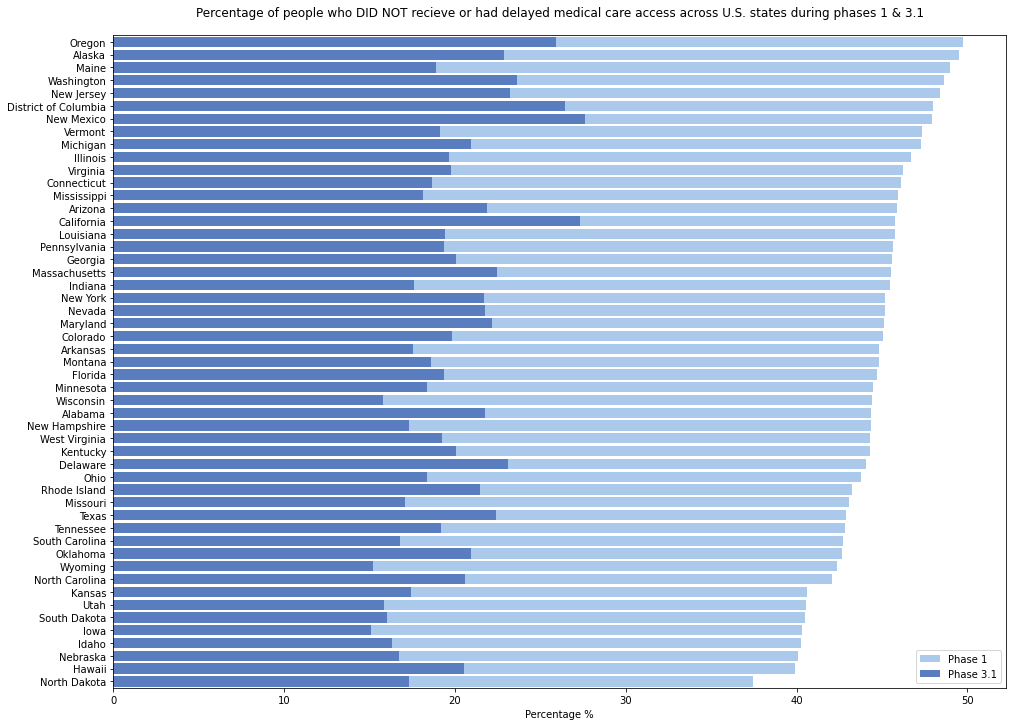

In [19]:
plt.figure(figsize=(16,12))
sns.set_color_codes('pastel')
sns.barplot(y=state_data_phase_1_df.index, x=state_data_phase_1_df['Phase_1 Value'], color='b', label='Phase 1')
sns.set_color_codes('muted')
sns.barplot(y=state_data_phase_1_df.index, x=state_data_phase_1_df['Phase_3.1 Value'], color='b', label='Phase 3.1')
plt.title('Percentage of people who DID NOT recieve or had delayed medical care access across U.S. states during phases 1 & 3.1', y=1.02)
plt.xlabel('Percentage %')
plt.ylabel('')
plt.legend()
plt.show()

In [22]:
# Subgroups = df_access_Delayed_Didnot.Subgroup.unique()
# plt.figure(figsize=(14,8))
# for sub in Subgroups:
#     plt.barh(y=sub, width=df_access_Didnot[df_access_Didnot['Subgroup']==sub].groupby('Phase_adj')['Value'].mean().iloc[0])
# plt.yticks(fontsize=13)
# plt.xticks(fontsize=13)
# plt.xlabel('Percentage %', fontsize=13)
# plt.title('Percentage of people that DID NOT have access to medical services across different ethnicities during Phase 1 (Apr 2020 - Aug 2020)', fontsize=14, y=1.05)
# plt.show()

In [131]:
minim = 45
for state in States[1:]:
    if np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]) < minim:
        minim = np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13])
        state_min = state
maxim = 0
for state in States[1:]:
    if np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]) > maxim:
        maxim = np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13])
        state_max = state

print('State with lowest percentage of delayed medical care access between Apr 2020 and Aug 2020: ', state_min)
print('State with highest percentage of delayed medical care access between Apr 2020 and Aug 2020: ', state_max)

State with lowest percentage of delayed medical care access between Apr 2020 and Aug 2020:  North Dakota
State with highest percentage of delayed medical care access between Apr 2020 and Aug 2020:  Oregon


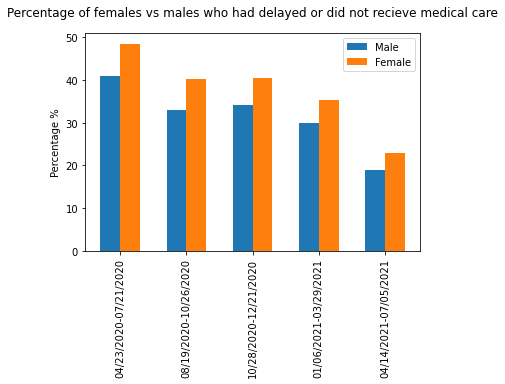

In [133]:
x = np.arange(0,5)
y_1 = df_access_Delayed_Didnot[df_access_Delayed_Didnot['Subgroup']=='Male'].groupby('Phase_adj')['Value'].mean()
y_2 = df_access_Delayed_Didnot[df_access_Delayed_Didnot['Subgroup']=='Female'].groupby('Phase_adj')['Value'].mean()
plt.bar(x-0.15, height=y_1, width=0.3, label='Male')
plt.bar(x+0.15, height=y_2, width=0.3, label='Female')
plt.xticks(x, phase_dict.values(), rotation='vertical')
plt.title('Percentage of females vs males who had delayed or did not recieve medical care', y=1.05)
plt.ylabel('Percentage %')
plt.legend()
plt.show()

## Depression vs health insurance

In [121]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
mental_care = pd.read_csv('./dataset/nchs_covid_mental_health_care.csv')
health_insurance = pd.read_csv('./dataset/nchs_covid_health_insurance_coverage.csv')
anexiety_project = pd.read_csv('./dataset/nchs_covid_indicators_of_anxiety_depression.csv')

In [123]:
anexiety_project.Phase.unique()

array(['1', '-1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1',
       '3.2', '3.3', '3.4'], dtype=object)

In [124]:
def pivot_tables(dataset):
    unique_indicators = dataset.Indicator.unique()
    L_pivot_data = []
    for indicator in unique_indicators:
        pivoted = pd.pivot_table(dataset[dataset.Indicator==indicator], values='Value', index=['Indicator', 'Group', 'State', 'Subgroup'], columns=['Time Period'])
        L_pivot_data.append(pivoted)
    return L_pivot_data
data_pivots = pivot_tables(anexiety_project)

In [125]:
def pipeline(origin):
    L_dfs = []
    unique_indicators = origin.Indicator.unique()
    for ind in unique_indicators:
        data = origin[origin['Indicator'] == ind]
        dict_phases = {}
        collective_df = pd.DataFrame()

        Subgroups_unique = data.Subgroup.unique()
        data['Phase'].replace(r'.*\d\s.*O.*', '3.02', regex=True, inplace=True)
        data['Phase'].replace(r'.*\d\s.*J.*', '3.05', regex=True, inplace=True)
        unique_phases = data.Phase.unique()
        time_phase = data[(data.Subgroup == Subgroups_unique[0]) & (data.Phase!= '-1')]
        for phase in unique_phases:
            L = []
            for i in range(len(time_phase)):
                if time_phase.Phase.values[i] == phase:
                    L.append(time_phase['Time Period'].values[i])
            dict_phases[phase] = L
        for subgroup in Subgroups_unique:
            s = pd.DataFrame(data[data.Subgroup==subgroup].groupby('Phase')['Value'].mean())
            s['Subgroup'] = subgroup
            collective_df = pd.concat([collective_df, s], axis=0 )
            
        collective_df.rename(columns={'Value' : ind}, inplace=True)   
        collective_df.dropna(inplace=True)
        collective_df.reset_index(inplace=True)
        L_dfs.append(collective_df)
        
    return L_dfs, unique_indicators

In [126]:
dfss, indicators = pipeline(anexiety_project)

D:\anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
def ohe(dataframes):
    L_ohe_dfs = []
    for data in dataframes:
        data.reset_index(inplace=True)
        data.drop(columns='index', inplace=True)
        m = len(data.Phase.unique())
        n = len(data)
        arr = np.zeros([n,m])
        for i in range(m):
            for j in range(n):
                if data.Phase.values[j] == data.Phase.unique()[i]:
                    arr[j,i] = 1
        nn = pd.DataFrame(arr, columns=data.Phase.unique())
        ohe = pd.concat([data, nn], axis=1)
        L_ohe_dfs.append(ohe)
    return L_ohe_dfs

In [128]:
L_dfs_Depr[0]

NameError: name 'L_dfs_Depr' is not defined

In [129]:
def plot_corr(data_1, unique_1, data_2, unique_2, verbose=False):
    m = len(data_1)
    n = len(data_2)
    plt.subplots(nrows=m, ncols=n, figsize=(30,20))   
    
    merged_dfs = []

    t = 0
    for i in range(m):
        for j in range(n):
            t+=1
            merged = pd.merge(data_1[i], data_2[j], on=['Phase', 'Subgroup'], how='left')
            merged.dropna(inplace=True)
            merged.rename(columns={'Value_x' : unique_1[i], 'Value_y' :unique_2[j]}, inplace=True)
            
            #move label column to first position
            col = merged.pop(unique_1[i])
            merged.insert(0, col.name, col)
            
            plt.subplot(m,n, t)
            plt.scatter(x=merged[unique_1[i]], y=merged[unique_2[j]])
            plt.title(f'{unique_1[i]} vs {unique_2[j]}')
            plt.xlabel(f'{unique_1[i]}')
            plt.ylabel(f'{unique_2[j]}')
            
            merged_dfs.append(merged)
    return merged_dfs

In [130]:
L_dfs_HS, unique_indicators_HS = pipeline(health_insurance)
L_dfs_Depr, unique_indicators_Depr = pipeline(anexiety_project)

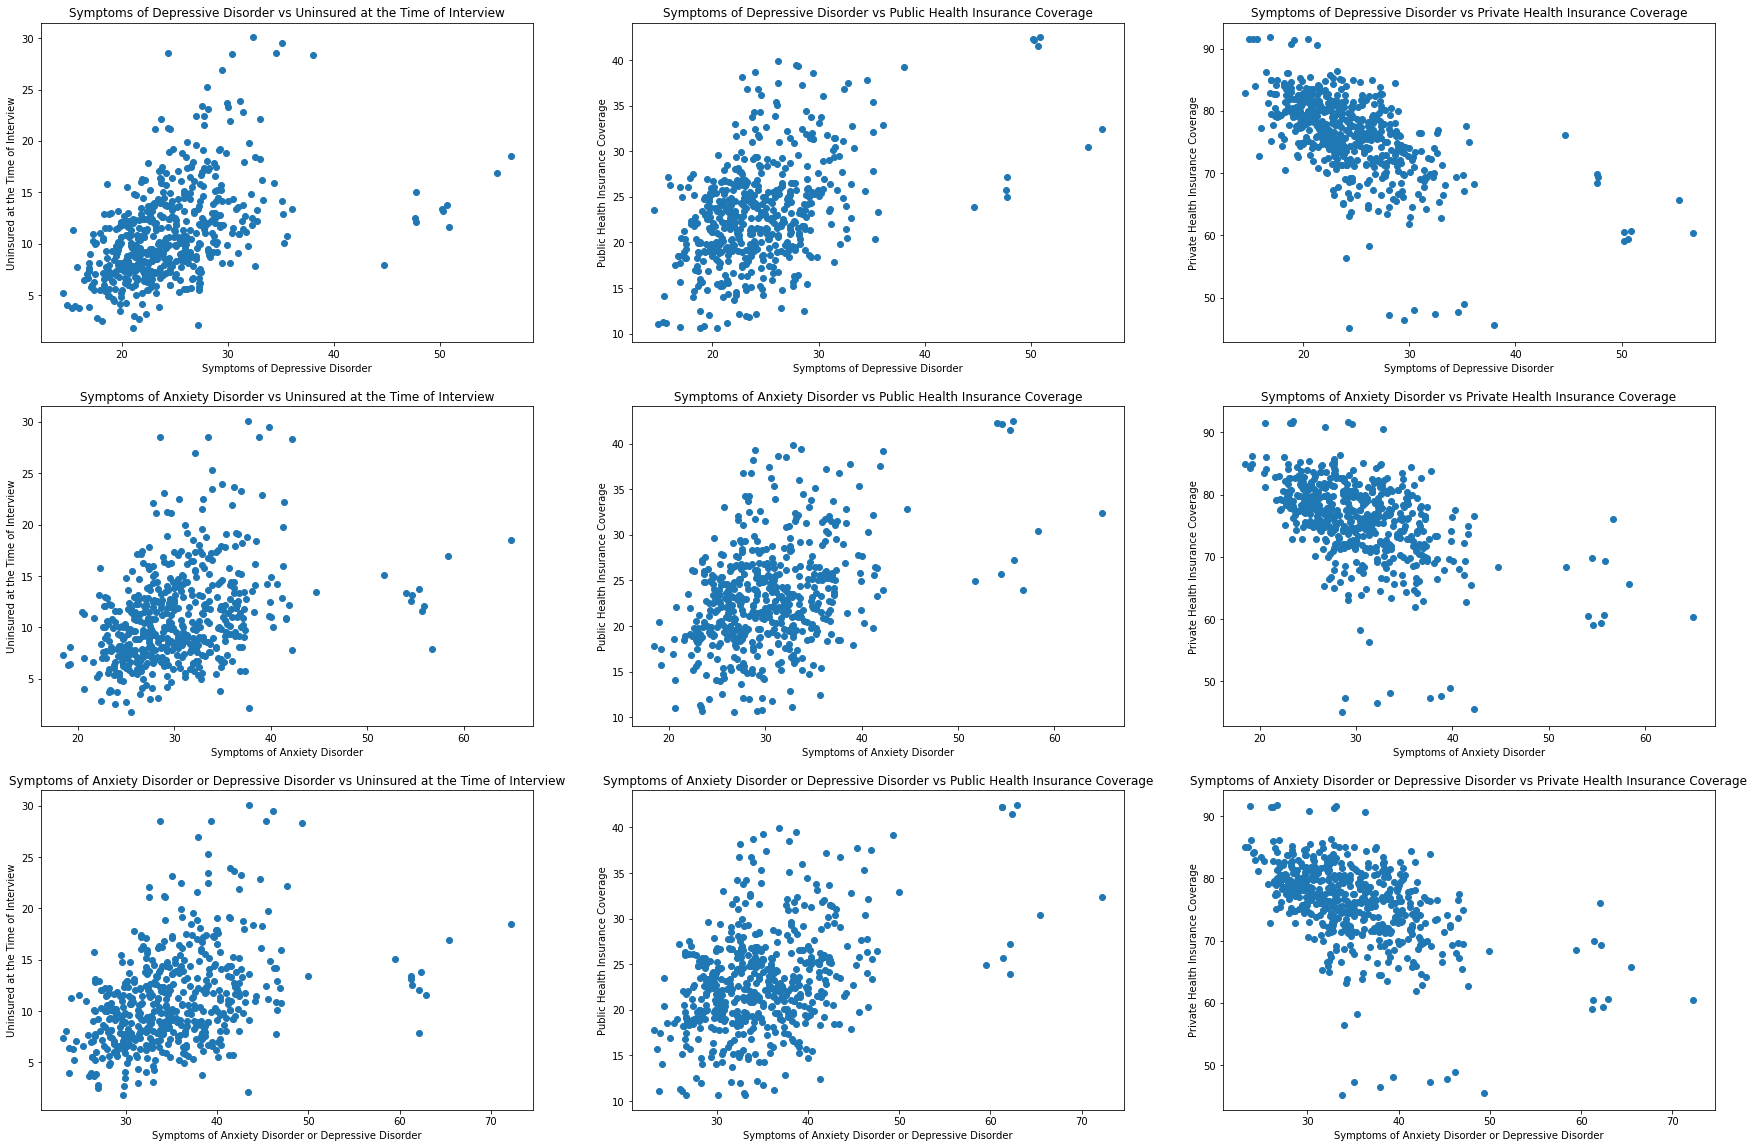

In [37]:
merged_dfs = plot_corr(pipeline(anexiety_project)[0], pipeline(anexiety_project)[1],
                       pipeline(health_insurance)[0], pipeline(health_insurance)[1])

In [38]:
ohe_df_final = ohe(merged_dfs)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
def model_train(data_ohe, quant):
    L_data = []
    L_models = []
    L_scores = []
    L_predictions = []
    True_labels = []
    
    for train in data_ohe:
        np.random.seed(42)
        q = train.iloc[:,3].quantile(0.80)
        ohe_train = train[train.iloc[:,3]<q]
        sample_df = ohe_train.sample(len(ohe_train))
        sample_df.drop(columns=['Phase', 'Subgroup'], inplace=True)

        X = sample_df.iloc[:, 1:].values
        y = sample_df.iloc[:, 0].values

        x_train,x_test, y_train,y_test = train_test_split(X, y, test_size=0.1)
        model = RandomForestRegressor()

        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        score = model.score(x_test,y_test)
        
        L_models.append(model)
        L_scores.append(score)
        L_data.append(sample_df)
        L_predictions.append(predictions)
        True_labels.append(y_test)
        
    return L_models, L_scores, L_data, L_predictions, True_labels

In [41]:
models, scores, data, predictions, labels = model_train(ohe_df_final, 0.80)
scores

[0.10128741891271698,
 0.25424333820878553,
 0.7593869341760378,
 0.2596564603175707,
 0.5558062608035436,
 0.7568878476299769,
 0.2431916395024103,
 0.5868083255125314,
 0.7541051801717554]

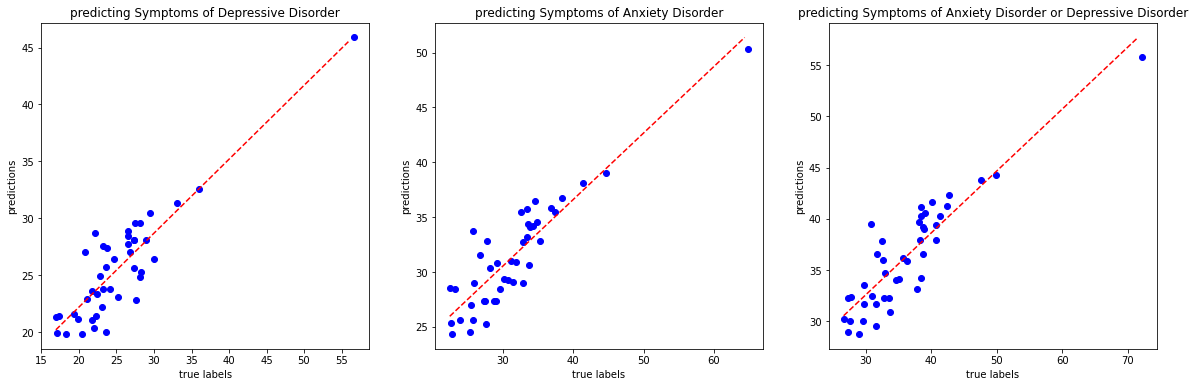

In [42]:
high_scores = [score for score in scores if score >= 0.7]
indicies = []
for j in range(len(high_scores)):
    indicies.append(scores.index(high_scores[j]))

plt.figure(figsize=(20,6))
k = 1
for i in indicies:
    plt.subplot(1,3,k)
    plt.scatter(labels[i], predictions[i], c='blue')
    plt.xlabel('true labels')
    plt.ylabel('predictions')
    plt.title(f'predicting {data[i].columns[0]}')
    x = np.arange(labels[i].min(), labels[i].max())
    slope, intercept = linregress(labels[i],predictions[i])[0], linregress(labels[i],predictions[i])[1]
    y = x*slope + intercept
    plt.plot(x,y, c='red', linestyle='--')
    k+=1


<AxesSubplot:>

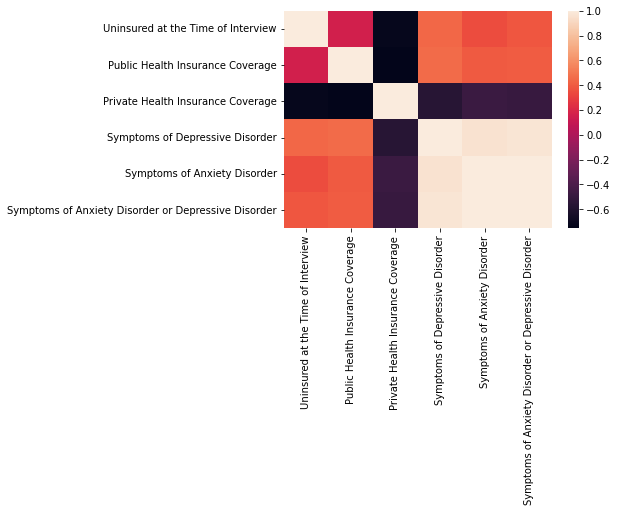

In [43]:

merged = L_dfs_HS[0]
for i in range(0, len(L_dfs_HS)-1):
    merged = pd.merge(merged, L_dfs_HS[i+1], on=['Phase', 'Subgroup'], how='left') 
for i in range(0, len(L_dfs_Depr)):
    merged = pd.merge(merged, L_dfs_Depr[i], on=['Phase', 'Subgroup'], how='left') 
merged.drop(columns=['Phase', 'Subgroup'], inplace=True)
sns.heatmap(merged.corr())

## PCA

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [81]:
def data_states(df, indicator, phases):
    df = df[(df.Indicator == indicator) &
           (df.Phase.isin(phases)) &
           (df.Group == 'By State')]
    df = df.groupby(['State', 'Phase']).mean().reset_index()
    df = pd.pivot_table(df, values='Value', index= 'State', columns= 'Phase')
    for phase in phases:
        df.rename(columns={phase: f'{indicator}_{phase}'}, inplace=True)
    return df

In [82]:
df_mental = pd.read_csv('./dataset/nchs_covid_mental_health_care.csv')
df_anexiety = pd.read_csv('./dataset/nchs_covid_indicators_of_anxiety_depression.csv')
df_access = pd.read_csv('./dataset/nchs_covid_reduced_access_to_health_care.csv')
df_insurance = pd.read_csv('./dataset/nchs_covid_health_insurance_coverage.csv')
df_telemedicine = pd.read_csv('./dataset/nchs_covid_telemedicine_usage.csv')

In [83]:
party = pd.read_csv('./dataset/party_affliation.csv')
party['party'] = np.where(party['Republican'] > party['Democratic'], 'Republican', 'Democratic')
party = party[['State', 'party']].set_index('State')
party.head()

,party
State,
Alabama,Republican
Alaska,Republican
Arizona,Republican
Arkansas,Republican
California,Democratic


In [62]:
#https://www.pewresearch.org/religion/religious-landscape-study/compare/political-ideology/by/state/
cons_lib = pd.read_csv('./dataset/party_consv_liber.csv').iloc[:, 0:4]
cons_lib['ideology'] = 0
for i in range(len(cons_lib)):
    if cons_lib.iloc[i, 1] == np.max(cons_lib.iloc[i, 1:4]):
        cons_lib['ideology'][i] = 'Conservative'
    elif cons_lib.iloc[i, 2] == np.max(cons_lib.iloc[i, 1:4]):
        cons_lib['ideology'][i] = 'Moderate'
    elif cons_lib.iloc[i, 3] == np.max(cons_lib.iloc[i, 1:4]):
        cons_lib['ideology'][i] = 'Moderate'
cons_lib.set_index('State', inplace=True)
cons_lib.head()

C:\Users\ahwal\AppData\Local\Temp/ipykernel_20360/3455605126.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Conservative,Moderate,Liberal,ideology
State,,,,
Alabama,0.50,0.29,0.12,Conservative
Alaska,0.34,0.37,0.23,Moderate
Arizona,0.39,0.31,0.23,Conservative
Arkansas,0.42,0.38,0.14,Conservative
California,0.31,0.34,0.29,Moderate


In [63]:
df_telemedicine.Indicator.unique()

array(['Provider offers telemedicine',
       'Scheduled one or more telemedicine appointments',
       'Provider offered telemedicine prior to pandemic'], dtype=object)

In [64]:
df_insurance.Indicator.unique()

array(['Uninsured at the Time of Interview',
       'Public Health Insurance Coverage',
       'Private Health Insurance Coverage'], dtype=object)

In [65]:
df_mental.Indicator.unique()

array(['Took Prescription Medication for Mental Health, Last 4 Weeks',
       'Received Counseling or Therapy, Last 4 Weeks',
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'],
      dtype=object)

In [66]:
df_anexiety.Indicator.unique()

array(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       'Symptoms of Anxiety Disorder or Depressive Disorder'],
      dtype=object)

In [67]:
df_access.Indicator.unique()

array(['Delayed Medical Care, Last 4 Weeks',
       'Did Not Get Needed Care, Last 4 Weeks',
       'Delayed or Did Not Get Care, Last 4 Weeks'], dtype=object)

### Health Care access

In [90]:
Indicator = ['Delayed or Did Not Get Care, Last 4 Weeks', 
             'Delayed Medical Care, Last 4 Weeks',
             'Did Not Get Needed Care, Last 4 Weeks']
dataset = df_access
L_dfs_processed = []


for ind in Indicator:
    L_dfs_processed.append(data_states(dataset, ind, ['1', '3.1']))


joined_dfs = L_dfs_processed[0]
for i in range(len(L_dfs_processed)-1):
    joined_dfs = joined_dfs.join(L_dfs_processed[i+1])

In [91]:
joined_dfs.head()

Phase,"Delayed or Did Not Get Care, Last 4 Weeks_1","Delayed or Did Not Get Care, Last 4 Weeks_3.1","Delayed Medical Care, Last 4 Weeks_1","Delayed Medical Care, Last 4 Weeks_3.1","Did Not Get Needed Care, Last 4 Weeks_1","Did Not Get Needed Care, Last 4 Weeks_3.1"
State,,,,,,
Alabama,44.350000,21.750000,39.200000,17.466667,33.400000,15.266667
Alaska,49.533333,22.850000,45.708333,19.550000,36.091667,15.283333
Arizona,45.900000,21.883333,41.016667,18.666667,34.241667,15.050000
Arkansas,44.850000,17.566667,40.575000,13.583333,33.841667,12.966667
California,45.741667,27.316667,41.116667,22.883333,33.058333,18.266667


In [93]:
import dataframe_image as dfi
dfi.export(joined_dfs.head(), 'dataframe_healthcareacess_pca.png')


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

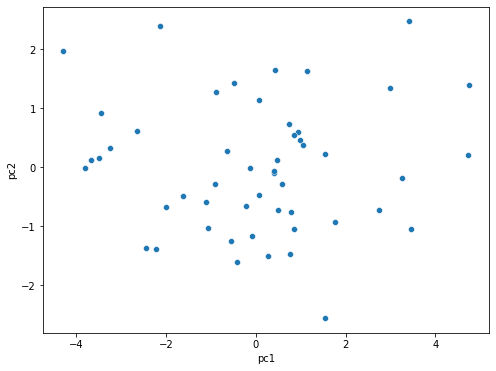

In [108]:
np.random.seed(42)
df_standardized = (joined_dfs - joined_dfs.mean())/np.std(joined_dfs)
u, s, vt = np.linalg.svd(df_standardized, full_matrices=False)
np.round(s**2 / sum(s**2), 2)
pcs = u * s

first_2_pcs = pd.DataFrame( {
    'pc1' : pcs[:, 0],
    'pc2' : pcs[:, 1]})

fig = plt.figure(figsize=(8,6))
sns.scatterplot(data = first_2_pcs, x = "pc1", y = "pc2")

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

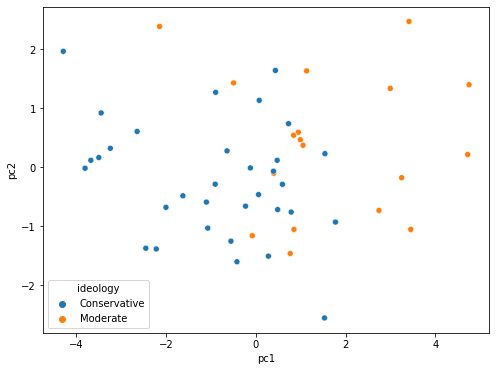

In [109]:
first_2_pcs = pd.DataFrame( {
    'pc1' : pcs[:, 0],
    'pc2' : pcs[:, 1]})
first_2_pcs['state'] = df_standardized.index
first_2_pcs.set_index('state', inplace=True)
first_2_pcs = first_2_pcs.join(cons_lib)
first_2_pcs.reset_index(inplace=True)

plt.figure(figsize=(8,6))
sns.scatterplot(data = first_2_pcs, x = "pc1", y = "pc2", hue='ideology')

# fig = px.scatter(first_2_pcs, x="pc1", y="pc2", color='ideology',
#                 hover_data={"state": True}); 

# fig.show()

### Mental Health

In [117]:
Indicator = ['Took Prescription Medication for Mental Health, Last 4 Weeks',
             'Received Counseling or Therapy, Last 4 Weeks',
             'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
             'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
dataset = df_mental

L_dfs_processed = []

for ind in Indicator:
    L_dfs_processed.append(data_states(dataset, ind, ['2', '3.1']))


joined_dfs = L_dfs_processed[0]
for i in range(len(L_dfs_processed)-1):
    joined_dfs = joined_dfs.join(L_dfs_processed[i+1])

In [118]:
joined_dfs.head()

Phase,"Took Prescription Medication for Mental Health, Last 4 Weeks_2","Took Prescription Medication for Mental Health, Last 4 Weeks_3.1","Received Counseling or Therapy, Last 4 Weeks_2","Received Counseling or Therapy, Last 4 Weeks_3.1","Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks_2","Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks_3.1","Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks_2","Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks_3.1"
State,,,,,,,,
Alabama,23.50,24.083333,7.38,8.866667,25.40,26.133333,10.06,11.133333
Alaska,16.02,17.483333,8.54,11.200000,19.46,21.850000,9.90,9.816667
Arizona,19.20,20.150000,8.58,8.950000,21.84,22.816667,10.66,10.583333
Arkansas,24.04,24.733333,6.24,7.566667,25.72,26.666667,9.90,9.750000
California,16.04,16.816667,9.88,10.466667,20.04,21.133333,10.80,10.483333


In [119]:
import dataframe_image as dfi
dfi.export(joined_dfs.head(), 'dataframe_mental.png')

In [79]:
import pandas as pd 
from pd.to import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, joined_dfs)  # where df is your data frame

plt.savefig('mytable.png')

ModuleNotFoundError: No module named 'pd'

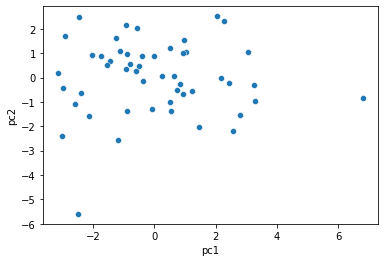

In [59]:
np.random.seed(42)
df_standardized = (joined_dfs - joined_dfs.mean())/np.std(joined_dfs)
u, s, vt = np.linalg.svd(df_standardized, full_matrices=False)
np.round(s**2 / sum(s**2), 2)
pcs = u * s

first_2_pcs = pd.DataFrame( {
    'pc1' : pcs[:, 0],
    'pc2' : pcs[:, 1]})

sns.scatterplot(data = first_2_pcs, x = "pc1", y = "pc2");

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

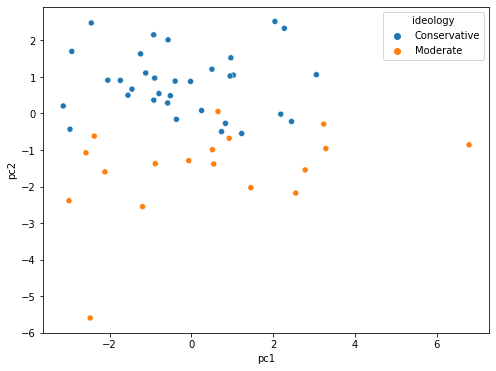

In [60]:
first_2_pcs = pd.DataFrame( {
    'pc1' : pcs[:, 0],
    'pc2' : pcs[:, 1]})
first_2_pcs['state'] = df_standardized.index
first_2_pcs.set_index('state', inplace=True)
first_2_pcs = first_2_pcs.join(cons_lib)
first_2_pcs.reset_index(inplace=True)

plt.figure(figsize=(8,6))
sns.scatterplot(data = first_2_pcs, x = "pc1", y = "pc2", hue='ideology')

# fig = px.scatter(first_2_pcs, x="pc1", y="pc2", color='ideology',
#                 hover_data={"state": True})
# fig.show()